## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

### Latent Dirichlet Allocation (LDA)

LDA is used here to estimate the relevance of documents to various topics. 

- Topic modeling (using gensim LDA model). 

<hr>

[More about Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)

[LDA Topic Modelling with Gensim](https://radimrehurek.com/gensim/models/ldamodel.html)



In [1]:
import pandas as pd 
import numpy as np
import ast

## Load features dataset
- Data is already pre-processed (1-Preprocessing). 
- Basic NLP features are already calculated (2-Features). 
- Some additional BoW features have been added (3-BoW).
- Some additional TF/IDF features have been added (3-TFIDF).
- N-Gram models have been generated (3-N-Grams). 
- PoS lists for each document identified (4-Lexicosemantics). 
- Writer's personality variables inferred (5-Personality).
- Sentiment analysis (6-Sentiment). 
- Topic modeling with LSA (7-LatentSemantic). 

In [2]:
feats_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_features_7.csv"
alex_df = pd.read_csv(feats_dataset_path, header=0, delimiter=";")

In [3]:
alex_df.sample(2)

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,AFINN_Words_Pol,AFINN_Stems_Pol,AFINN_Words_Int,AFINN_Stems_Int,AFINN_Words_Max,AFINN_Stems_Max,Watson_Sent,Clean_Text,LDA4_Umap2_0,LDA4_Umap2_1
333,f0d1b10c588c9b3a3d5e4921a26043f6,70,22,20,28,2,43,11,0,0,...,-1,0,0.5,0.0,1,0,-0.868954,alguien escapando llegando cruzar rio,-0.563637,6.554140
72,11234a3a0859093a668ef4669db3f148,69,22,20,27,1,43,11,0,0,...,0,4,0.0,2.0,0,4,0.679537,frondoso mágico bosque lleno animales fantásti...,1.245992,3.226087


In [4]:
alex_df.Card.value_counts()

9VH     89
1       85
11      83
13HM    81
Name: Card, dtype: int64

## LDA Analysis

In [5]:
import gensim
from gensim import corpora

In [43]:
# We're using the list of stopped tokens as corpus, we could also use lemmas, and remove punctuation.
corpus = [ast.literal_eval(doc) for doc in alex_df.Tokens_Stop]

In [44]:
# Getting the dictionary (lexicon) of the corpus
dictionary = corpora.Dictionary(corpus)

In [45]:
dictionary.get(17)

'triste'

In [46]:
dictionary.doc2bow(["hombre"])

[(5, 1)]

In [47]:
# Document-Term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

In [48]:
# Gensim LDA model object
LDA = gensim.models.ldamodel.LdaModel

In [49]:
# Running and Trainign LDA model on the document term matrix with 4 topics
LDA_model = LDA(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

In [50]:
LDA_model.print_topics()

[(0,
  '0.033*"violín" + 0.029*"niño" + 0.020*"tocar" + 0.009*"música" + 0.008*"padres" + 0.007*"quería" + 0.007*"clases" + 0.006*"aprender" + 0.005*"gustaba" + 0.005*"pensando"'),
 (1,
  '0.007*"día" + 0.005*"hombre" + 0.005*"dragón" + 0.005*"cascada" + 0.005*"montaña" + 0.004*"bosque" + 0.004*"tesoro" + 0.004*"tras" + 0.004*"mañana" + 0.004*"descansando"'),
 (2,
  '0.014*"hombre" + 0.013*"mujer" + 0.005*"vida" + 0.004*"personas" + 0.004*"si" + 0.004*"ser" + 0.004*"cascada" + 0.004*"día" + 0.004*"tiempo" + 0.004*"encontró"'),
 (3,
  '0.013*"día" + 0.007*"trabajar" + 0.006*"grupo" + 0.006*"siesta" + 0.006*"después" + 0.005*"trabajo" + 0.005*"hombre" + 0.005*"campo" + 0.005*"hacer" + 0.005*"hombres"')]

In [59]:
LDA_model.show_topic(3)

[('día', 0.012806963),
 ('trabajar', 0.006809864),
 ('grupo', 0.0064238124),
 ('siesta', 0.0063998112),
 ('después', 0.0057050227),
 ('trabajo', 0.00534794),
 ('hombre', 0.0051363),
 ('campo', 0.00503226),
 ('hacer', 0.0048243674),
 ('hombres', 0.0047728457)]

In [75]:
# Get the topic probas for a new doc:
topic_vector = LDA_model.get_document_topics(dictionary.doc2bow(["hombre","que","fuma"]))

In [76]:
topic_vector

[(0, 0.12741445), (1, 0.12890203), (2, 0.61502707), (3, 0.12865643)]

In [80]:
def get_MostProbTopic(topicvec):
    maxProb = 0
    maxTuple = (0,0)
    for tuple in topicvec:
        if (tuple[1] > maxProb):
            maxProb = tuple[1]
            maxTuple = tuple
    return maxTuple[0]

In [81]:
get_MostProbTopic(topic_vector)

2

### LDA Model evaluation
- See [Coherence measure](https://radimrehurek.com/gensim/models/coherencemodel.html)

In [53]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('Perplexity: ', LDA_model.log_perplexity(doc_term_matrix)) 

Perplexity:  -7.812170350539269


In [55]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=LDA_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4086385172371717


### Search for the best LDA model (higher coherence)

In [84]:
topic_nums = []
coherence_values = []
for Num_Topics in range(2,12):
    topic_nums.append(Num_Topics)
    LDA_model = LDA(doc_term_matrix, num_topics=Num_Topics, id2word = dictionary, passes=50)
    coherence_model_lda = CoherenceModel(model=LDA_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    print("Num.Topics: %d --> Coherence: %f" % (Num_Topics,coherence_lda))

Num.Topics: 2 --> Coherence: 0.324575
Num.Topics: 3 --> Coherence: 0.437372
Num.Topics: 4 --> Coherence: 0.419226
Num.Topics: 5 --> Coherence: 0.361943
Num.Topics: 6 --> Coherence: 0.359344
Num.Topics: 7 --> Coherence: 0.397478
Num.Topics: 8 --> Coherence: 0.407949
Num.Topics: 9 --> Coherence: 0.408794
Num.Topics: 10 --> Coherence: 0.433290
Num.Topics: 11 --> Coherence: 0.400449


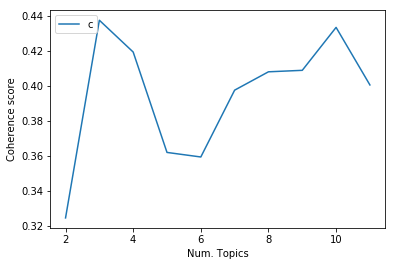

In [87]:
import matplotlib.pyplot as plt
plt.plot(topic_nums, coherence_values)
plt.xlabel("Num. Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Will LDA with 10 topics be usefull for alexithymia classification?

In [89]:
# let's use the 10 topics model
LDA_model = LDA(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [90]:
def calculateTopic(token_list_str):
    token_list = ast.literal_eval(token_list_str)
    topic_vector = LDA_model.get_document_topics(dictionary.doc2bow(token_list))
    return get_MostProbTopic(topic_vector)

In [98]:
# alex_df.drop(['LDA_Topic'], axis='columns', inplace=True)

In [100]:
alex_df['LDA10_Topic'] = alex_df.Tokens_Stop.apply(lambda x: calculateTopic(x))

In [101]:
alex_df['LDA10_Topic'].describe()

count    338.000000
mean       4.979290
std        3.116366
min        0.000000
25%        2.000000
50%        6.000000
75%        8.000000
max        9.000000
Name: LDA10_Topic, dtype: float64

In [105]:
alex_df[['Alex_A','LDA10_Topic']].corr()

,Alex_A,LDA10_Topic
Alex_A,1.000000,0.026436
LDA10_Topic,0.026436,1.000000


### Calculate the topic for 4 topics 

In [102]:
LDA_model = LDA(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

In [103]:
alex_df['LDA4_Topic'] = alex_df.Tokens_Stop.apply(lambda x: calculateTopic(x))

In [106]:
alex_df['LDA4_Topic'].describe()

count    338.000000
mean       1.245562
std        1.025807
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: LDA4_Topic, dtype: float64

In [104]:
alex_df[['Alex_A','LDA4_Topic']].corr()

,Alex_A,LDA4_Topic
Alex_A,1.00000,0.10137
LDA4_Topic,0.10137,1.00000


### Topic visualization

In [67]:
# ! pip install pyldavis

In [70]:
import pyLDAvis.gensim 
import pyLDAvis

In [107]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(LDA_model, doc_term_matrix, dictionary)
vis

C:\Users\array\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.136816 -0.002831       1        1  30.572557
1     -0.073762  0.081178       2        1  29.285522
2     -0.060254 -0.107144       3        1  23.706024
3     -0.002800  0.028798       4        1  16.435892, topic_info=     Category       Freq         Term      Total  loglift  logprob
32    Default  61.000000       violín  61.000000  30.0000  30.0000
31    Default  38.000000        tocar  38.000000  29.0000  29.0000
1     Default  53.000000         niño  53.000000  28.0000  28.0000
5     Default  40.000000       hombre  40.000000  27.0000  27.0000
202   Default  11.000000     aprender  11.000000  26.0000  26.0000
61    Default  12.000000       clases  12.000000  25.0000  25.0000
46    Default  17.000000      cascada  17.000000  24.0000  24.0000
171   Default  11.000000  descansando  11.000000  23.0000  23.0000
8     Default  28.000000        mujer  28.000000  22.0000  22.0000
15    Default  19.000000       padres  19.000000  21.0000  21.0000
2     Default  11.000000     pensando  11.000000  20.0000  20.0000
549   Default  16.000000       música  16.000000  19.0000  19.0000
9     Default   8.000000      cansado   8.000000  18.0000  18.0000
987   Default   8.000000       tesoro   8.000000  17.0000  17.0000
198   Default   9.000000  instrumento   9.000000  16.0000  16.0000
36    Default  12.000000      hombres  12.000000  15.0000  15.0000
57    Default   9.000000         años   9.000000  14.0000  14.0000
41    Default  14.000000          sol  14.000000  13.0000  13.0000
4     Default   7.000000         sabe   7.000000  12.0000  12.0000
422   Default  11.000000      gustaba  11.000000  11.0000  11.0000
149   Default   8.000000    obligaban   8.000000  10.0000  10.0000
411   Default   9.000000       dragón   9.000000   9.0000   9.0000
462   Default   7.000000        sabía   7.000000   8.0000   8.0000
1450  Default   5.000000      parecía   5.000000   7.0000   7.0000
397   Default  11.000000     trabajar  11.000000   6.0000   6.0000
170   Default   8.000000       violin   8.000000   5.0000   5.0000
155   Default   9.000000    durmiendo   9.000000   4.0000   4.0000
298   Default  16.000000          ser  16.000000   3.0000   3.0000
117   Default   4.000000      pájaros   4.000000   2.0000   2.0000
22    Default  18.000000      después  18.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
25     Topic4   4.242529        noche  12.683018   0.7106  -5.4144
367    Topic4   4.169317          tan  13.563148   0.6261  -5.4318
190    Topic4   2.600716      piedras   6.028976   0.9649  -5.9038
50     Topic4   7.251493          día  40.000721   0.0980  -4.8784
188    Topic4   3.201742        mundo  10.027431   0.6641  -5.6959
977    Topic4   1.975824       buscar   3.954615   1.1118  -6.1786
914    Topic4   1.974137       verano   3.956108   1.1106  -6.1794
482    Topic4   1.976237         mesa   3.979123   1.1058  -6.1784
227    Topic4   2.593319       muerta   7.275738   0.7741  -5.9066
409    Topic4   3.200377       camino  12.962766   0.4069  -5.6963
151    Topic4   3.469792       quería  16.065483   0.2731  -5.6155
222    Topic4   2.882234        lugar  10.880767   0.4773  -5.8010
2168   Topic4   1.712739    solitario   3.218634   1.1748  -6.3215
255    Topic4   3.193271         vida  15.391369   0.2329  -5.6985
1      Topic4   5.251109         niño  53.749435  -0.5202  -5.2011
64     Topic4   3.193156        hacer  15.931591   0.1984  -5.6986
816    Topic4   2.519419            q  10.306963   0.3969  -5.9355
1473   Topic4   1.978988        llegó   5.436468   0.7952  -6.1770
56     Topic4   2.592232        ahora  12.514745   0.2313  -5.9070
1047   Topic4   1.978987     encontró   5.946062   0.7056  -6.1770
32     Topic4   4.115422       violín  61.490005  -0.8984  -5.4448
19     Topic4   2.586115       amigos  15.153358   0.0376  -5.9094
97     Topic4  

## Persist the new features

In [108]:
alex_df.columns[len(alex_df.columns)-2:len(alex_df.columns)]

Index(['LDA10_Topic', 'LDA4_Topic'], dtype='object')

In [109]:
# Save Updated features dataset
Feats_8_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_features_8.csv"
alex_df.to_csv(Feats_8_path, sep=';', encoding='utf-8', index=False)